In [218]:
import pandas as pd
%matplotlib inline

In [219]:
df = pd.read_csv('../../../res/credit-card/credit-card-preprocessed.csv')

In [220]:
# Preprocessing

df = df.drop(columns=["CUST_ID"])
print(df.isna().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [221]:
# Detect Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
# TODO: Add more description (percentage)

BALANCE                              695
BALANCE_FREQUENCY                   1492
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     774
PRC_FULL_PAYMENT                    1474
TENURE                              1365
dtype: int64

In [222]:
# Scale continuous features to give all features with equal importance
# Too sensitive for outliers
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# mms.fit(df)
# data_transformed = mms.transform(df)


In [223]:
# Scale data
# from sklearn.preprocessing import StandardScaler
# data_transformed = StandardScaler().fit_transform(df)

In [224]:
# robust scaler
# Robust scalar is used as it yielded the best results due to outliers in the data set
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_transformed = scaler.fit_transform(df)
# robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

In [225]:
# Reduce dimensions
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
data_transformed = pca_2.fit_transform(data_transformed)

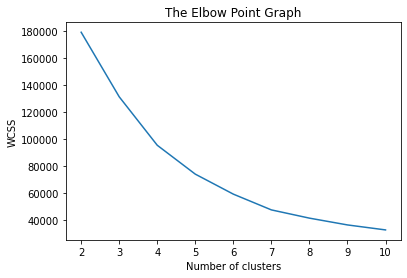

In [226]:
# Elbow Point Graph
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
wcss = []
kmeans_arr = []
for i in range(2, 11):
   kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
   kmeans.fit(data_transformed)
   kmeans_arr.append(kmeans)
   wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [227]:

# from sklearn.metrics import silhouette_samples, silhouette_score
# import matplotlib.cm as cm
# import numpy as np
# for n_clusters, kmeans in enumerate(kmeans_arr):
#     # Add 2 two n_clusters since enumerate gives index 0 at the beginning
#     # but the first Kmeans has 1 centroid
#     if n_clusters >= 0:
#         n_clusters = n_clusters + 2
#    # Create a subplot with 1 row and 2 columns
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)

#     ax1.set_xlim([-0.1, 1])
#     ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])

#     cluster_labels = kmeans.predict(data_transformed)
#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(data_transformed, cluster_labels)
#     print(
#         "For n_clusters =",
#         n_clusters,
#         "The average silhouette_score is :",
#         silhouette_avg,
#     )

#     sample_silhouette_values = silhouette_samples(
#         data_transformed, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(
#             np.arange(y_lower, y_upper),
#             0,
#             ith_cluster_silhouette_values,
#             facecolor=color,
#             edgecolor=color,
#             alpha=0.7,
#         )

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples


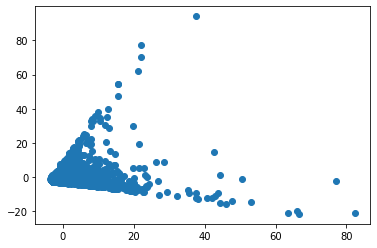

In [228]:
# Plot the scaled and reduced data
plt.scatter(data_transformed[:,0],data_transformed[:,1])
plt.show()

In [229]:
# Determine the metric score for every k number of clusters
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

clusters = []
davies = []
calinski = []

for cluster_num in range(2,11):
    km = KMeans(
    n_clusters=cluster_num, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )

    labels = km.fit_predict(data_transformed)
    clusters.append(cluster_num)
    davies.append(davies_bouldin_score(data_transformed, labels))
    calinski.append(calinski_harabasz_score(data_transformed, labels))

metrics_summary = pd.DataFrame()
metrics_summary["cluters"] = clusters
metrics_summary["davies"] = davies
metrics_summary["calinski"] = calinski

metrics_summary

,cluters,davies,calinski
0,2,0.959852,3811.249409
1,3,0.698244,4233.548359
2,4,0.643629,5012.190338
3,5,0.668053,5498.310270
4,6,0.654886,5953.801602
5,7,0.638485,6554.506555
6,8,0.690187,6641.168432
7,9,0.692081,6777.292477
8,10,0.744202,6819.930747


In [230]:
# Cluster that yielded that lowest davies score
metrics_summary[metrics_summary["davies"] == metrics_summary["davies"].min()]

,cluters,davies,calinski
5,7,0.638485,6554.506555


In [231]:
# Creation of Kmeans model
km = KMeans(
    n_clusters=7, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

# Get labels of each row in dataframe
labels = km.fit_predict(data_transformed)


Clustered Visualization: 
Black point - Centroid


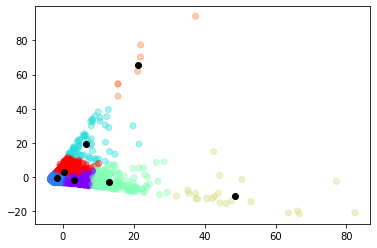

In [386]:
colors = ["red", "green", "blue", "pink", "violet", "peachpuff", "aqua"]
# Possible colors in 
plt.scatter(data_transformed[:,0],data_transformed[:,1], c=km.labels_ ,cmap='rainbow', alpha=0.4)
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1], color='black')
print("Clustered Visualization: ")
print("Black point - Centroid")
plt.show()

In [233]:
print("Davies_Bouldin_Score:",davies_bouldin_score(data_transformed, labels))
print("Calinski_Harabasz_Score:",calinski_harabasz_score(data_transformed, labels))

Davies_Bouldin_Score: 0.6384853030261447
Calinski_Harabasz_Score: 6554.506555306001


In [234]:
print("\nLabel Clusters: ")
print(np.unique(labels))

# Count all occurences of unique values in labels
counts = np.bincount(labels)
print("\nCount Occurrences per labels: ")
print(counts)

# Get centroid of each cluster
centroids = km.cluster_centers_
print("\nx,y of Centroids per cluster: ")
print(centroids)

# Append new column in dataframe
df["cluster"] = labels

# The last column corresponds to the cluster the row is categorized in
df.head()


Label Clusters: 
[0 1 2 3 4 5 6]

Count Occurrences per labels: 
[1283 6054   77  232   22    7 1274]

x,y of Centroids per cluster: 
[[  3.15620894  -1.71188471]
 [ -1.52899565  -0.513757  ]
 [  6.52480202  19.4482595 ]
 [ 13.16450164  -2.64810493]
 [ 48.63382049 -10.76893157]
 [ 21.31761575  65.67023359]
 [  0.33200539   3.29222006]]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [235]:
# Create list of dataframes, where each dataframe only contain users of the same cluster
# The index of array correspond to the dataframe's cluster it represents
cluster_dfs = []
for cluster_num in range(0,len(km.labels_+1)):
    cluster_dfs.append(df[df["cluster"] == cluster_num])

In [236]:
# Create a bar graph for every cluster (values will be the average for each column )

In [237]:
# TODO: Compare each cluster with from each other and interpret
#       Create generalizations per cluster

In [238]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df)
np_normalized = mms.transform(df)
df_scaled = pd.DataFrame(np_normalized, columns=df.columns, index=df.index)
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0,0.166667
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0,1.000000
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0,0.166667
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011312,0.000000,1.0,0.166667
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,0.001496,1.000000,0.005936,0.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.006419,0.000640,0.500000,0.0,0.166667
8945,0.001007,1.000000,0.006118,0.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.031720,0.005439,0.011312,0.000000,0.0,0.166667
8946,0.001229,0.833333,0.002945,0.000000,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.031720,0.001602,0.001078,0.250000,0.0,0.166667
8947,0.000707,0.833333,0.000000,0.000000,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.015025,0.001036,0.000729,0.250000,0.0,0.166667


In [260]:
import numpy as np
df_scaled = df.copy()
columns = df.columns

for column in columns:
    if column != "cluster":
        df_scaled[column] = (df_scaled[column] - df_scaled[column].min()) / (df_scaled[column].max() - df_scaled[column].min())

In [283]:
for cluster_num in range(0,8):
    cluster = df[df["cluster"] == cluster_num]["CASH_ADVANCE"].mean()
    print(cluster)

435.36625840841776
533.4919609578791
2876.7894914155845
1196.3566233448273
1014.2064007727273
1008.546231
3488.1746235769233
nan


In [310]:
# Get mean of all attributes per cluster
cluster_means = []

for cluster_num in range(0,7):
    cluster = df[df["cluster"] == cluster_num].mean()
    cluster_means.append(cluster)

# Turn array into data frame
cluster_means = pd.DataFrame(cluster_means, columns=df.columns)

In [372]:
cluster_means.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3921.116230,0.956300,6133.550734,4385.634668,1748.047344,1507.561656,0.651765,0.360875,0.523270,0.131636,4.169798,46.793003,7678.265412,6902.111505,10885.379575,0.187602,11.797036,3.000000
std,2136.048161,0.056848,10155.335677,8365.490515,1865.848744,1189.207839,0.239475,0.355301,0.180367,0.113345,3.580892,45.134692,4065.554699,9616.748717,19138.945640,0.200339,0.205768,2.160247
min,830.631151,0.833166,373.617641,0.000000,200.960842,435.366258,0.380911,0.000000,0.282546,0.041667,1.370226,7.343244,3373.156883,882.588746,375.662164,0.000000,11.406508,0.000000
25%,2517.216239,0.954602,893.751152,207.231846,595.017954,771.019096,0.456968,0.105541,0.377966,0.060999,1.935287,14.899565,5828.172101,2537.729874,1048.736935,0.013185,11.729061,1.500000
50%,4526.812436,0.981190,1714.498571,356.055455,986.194489,1014.206401,0.571429,0.127688,0.571429,0.100575,2.285714,34.142857,6457.142857,2908.922451,2182.595232,0.143976,11.883117,3.000000
75%,5190.928380,0.985271,5332.537173,3535.233127,2161.717583,2036.573057,0.883453,0.672088,0.661284,0.146777,5.434253,65.087442,8187.425152,5655.730992,9460.746386,0.309638,11.915752,4.500000
max,6674.080781,1.000000,28394.162273,22858.457273,5535.705000,3488.174624,0.929173,0.843182,0.730412,0.363662,10.793564,126.090909,15886.363636,28136.347604,52620.432990,0.523588,12.000000,6.000000


In [370]:
df_scaled.max()

BALANCE                             1.0
BALANCE_FREQUENCY                   1.0
PURCHASES                           1.0
ONEOFF_PURCHASES                    1.0
INSTALLMENTS_PURCHASES              1.0
CASH_ADVANCE                        1.0
PURCHASES_FREQUENCY                 1.0
ONEOFF_PURCHASES_FREQUENCY          1.0
PURCHASES_INSTALLMENTS_FREQUENCY    1.0
CASH_ADVANCE_FREQUENCY              1.0
CASH_ADVANCE_TRX                    1.0
PURCHASES_TRX                       1.0
CREDIT_LIMIT                        1.0
PAYMENTS                            1.0
MINIMUM_PAYMENTS                    1.0
PRC_FULL_PAYMENT                    1.0
TENURE                              1.0
cluster                             6.0
dtype: float64

In [288]:
len(clusters[0])

18

In [385]:
for cluster_num in range(0,7):
    cluster = df[df["cluster"] == cluster_num]
    print(f'Cluster {cluster_num} - {(len(cluster)/len(df))*100}')

Cluster 0 - 14.336797407531568
Cluster 1 - 67.65001676164934
Cluster 2 - 0.8604313331098447
Cluster 3 - 2.5924684322270646
Cluster 4 - 0.2458375237456699
Cluster 5 - 0.07822103028271316
Cluster 6 - 14.236227511453794


In [316]:
cluster = df_scaled[df_scaled["cluster"] == 0]
cluster


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0.102128,0.730705,0.082178,0.07396,0.147192,0.0,0.885047,0.691304,0.769355,0.064619,0.0,0.258587,0.236275,0.074236,0.002989,0.582434,0.691378,0.0


In [330]:
clusters = []

for cluster_num in range(0,7):
    cluster = df_scaled[df_scaled["cluster"] == cluster_num].mean()
    cluster = cluster.drop("cluster")
    cluster = [*cluster, cluster[0]]
    clusters.append(cluster)

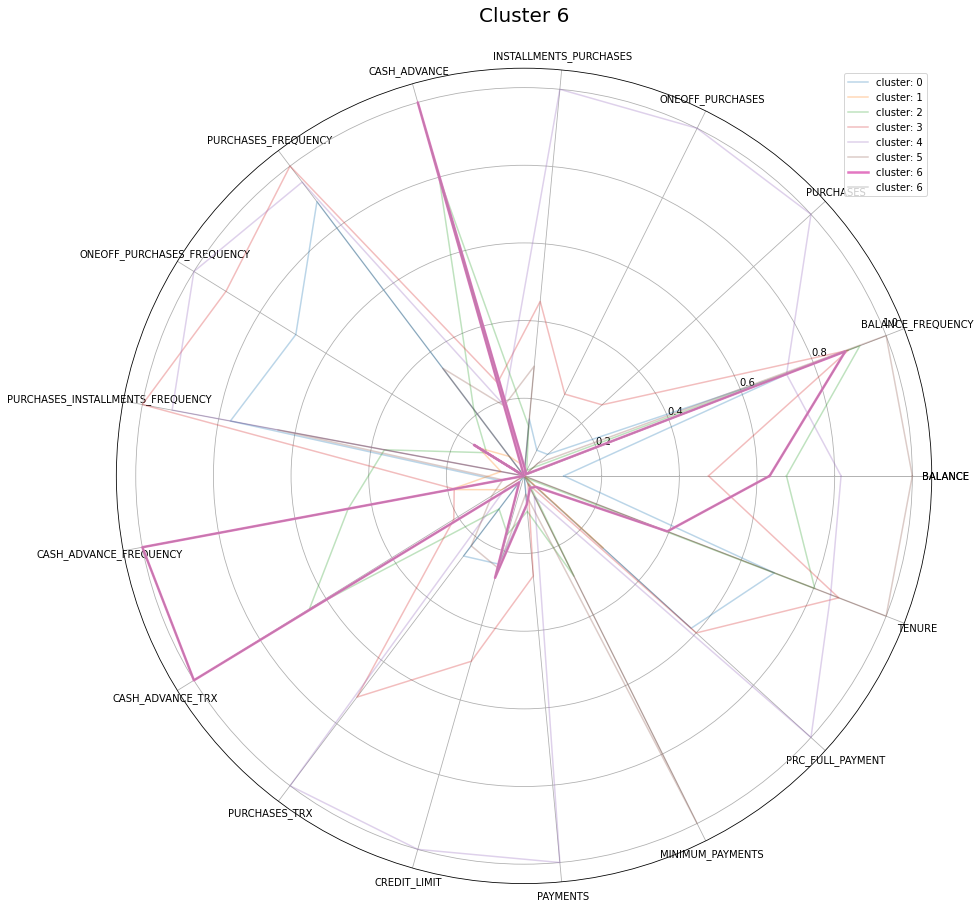

In [381]:
categories = df_scaled.columns
# Remove "cluster column"
categories = categories.delete(-1)
categories = [*categories, categories[0]]

clusters = []

# Create an array containing all mean values of attributes per cluster
for cluster_num in range(0,7):
    cluster = df_scaled[df_scaled["cluster"] == cluster_num].mean()
    cluster = cluster.drop("cluster")
    cluster = [*cluster, cluster[0]]
    clusters.append(cluster)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(15, 15))
plt.subplot(polar=True)

# Change value of highlight variable to highlight a specific cluster
# Value of -1 indicates no cluster to highlight
highlight = 6
for cluster_num in range(0,len(clusters)):
    label = "cluster: " + str(cluster_num)
    if highlight != -1 and cluster_num == highlight:
        plt.plot(label_loc, clusters[cluster_num], label=label, alpha=1, linewidth=2.5)
    plt.plot(label_loc, clusters[cluster_num], label=label, alpha=.3)

plt.title('Cluster ' + str(highlight), size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()